# bashで実行
```bash
$ aws cloudwatch get-metric-data --metric-data-queries file://./metric-data-queries.json --start-time '2022-03-01T00:00:00' --end-time '2022-03-14T23:59:59'
```

In [66]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io
import json
import os

jsonBuf = open(f"{os.getcwd()}/metrics_01.json", 'r')
obj = json.load(jsonBuf)
arr = [f"{x},{y}" for x, y in zip(obj['MetricDataResults'][0]['Timestamps'], obj['MetricDataResults'][0]['Values'])]
df = pd.read_csv(io.StringIO('\n'.join(arr)), names=('datetime', 'request_count'))
df


,datetime,request_count
0,2022-03-14T23:50:00Z,140904.0
1,2022-03-14T23:40:00Z,161045.0
2,2022-03-14T23:30:00Z,219187.0
3,2022-03-14T23:20:00Z,295555.0
4,2022-03-14T23:10:00Z,539721.0
...,...,...
7592,2022-01-21T06:30:00Z,14984.0
7593,2022-01-21T06:20:00Z,18398.0
7594,2022-01-21T06:10:00Z,23251.0
7595,2022-01-21T06:00:00Z,35892.0


<AxesSubplot:xlabel='datetime'>

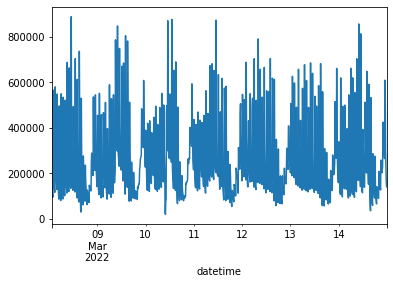

In [72]:
cloned = df.copy()
cloned['datetime'] = pd.to_datetime(cloned['datetime'], infer_datetime_format=True)
y = pd.Series(cloned['request_count'].values, index=cloned['datetime'])
y = y.astype('f')
y1000 = y[:1000]
y1000.plot()

<AxesSubplot:xlabel='datetime'>

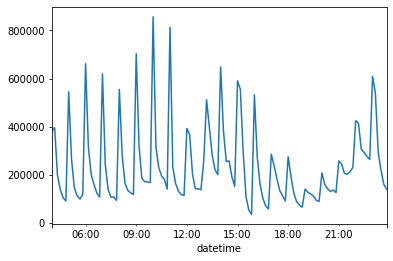

In [86]:
y120 = y[:120]
y120.plot()

In [87]:
jsonBuf02 = open(f"{os.getcwd()}/metrics_02.json", 'r')
obj02 = json.load(jsonBuf02)
arr02 = [f"{x},{y}" for x, y in zip(obj02['MetricDataResults'][0]['Timestamps'], obj02['MetricDataResults'][0]['Values'])]
df02 = pd.read_csv(io.StringIO('\n'.join(arr02)), names=('datetime', 'request_count'))
df02


,datetime,request_count
0,2022-03-14T23:50:00Z,32212858.0
1,2022-03-14T23:40:00Z,32780538.0
2,2022-03-14T23:30:00Z,33301109.0
3,2022-03-14T23:20:00Z,33913561.0
4,2022-03-14T23:10:00Z,34503849.0
...,...,...
7282,2022-01-23T10:10:00Z,28210167.0
7283,2022-01-23T10:00:00Z,27590198.0
7284,2022-01-23T09:50:00Z,27560086.0
7285,2022-01-23T09:40:00Z,27500470.0


<AxesSubplot:xlabel='datetime'>

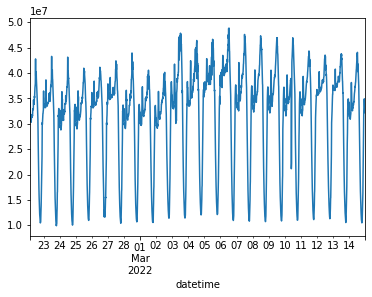

In [152]:
cloned02 = df02.copy()
cloned02['datetime'] = pd.to_datetime(cloned02['datetime'], infer_datetime_format=True)
y02 = pd.Series(cloned02['request_count'].values, index=cloned02['datetime'])
y02 = y02.astype('f')
y02_1000 = y02[:3000]
y02_1000.plot()

<AxesSubplot:xlabel='datetime'>

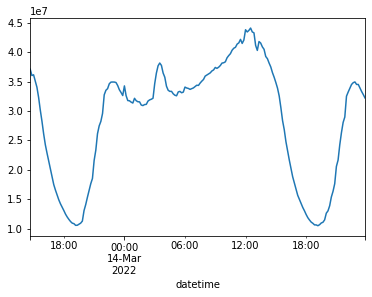

In [92]:
y02_200 = y02[:200]
y02_200.plot()

<AxesSubplot:xlabel='datetime'>

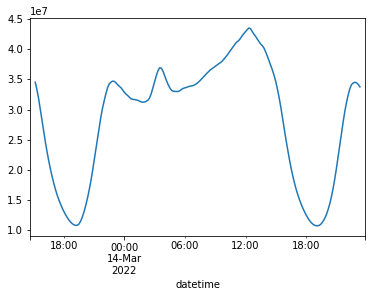

In [93]:
y02_200_ma = y02_200.rolling(6).mean().shift(-3)
y02_200_cma = y02_200_ma.rolling(2).mean()
y02_200_cma.plot()

/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -10T will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51618D+01    |proj g|=  6.82121D-04

At iterate    5    f=  1.51618D+01    |proj g|=  2.07834D-05

At iterate   10    f=  1.51618D+01    |proj g|=  4.17444D-05

At iterate   15    f=  1.51618D+01    |proj g|=  1.35003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     28      1     0     0   1.492D-05   1.516D+01
  F =   15.161764996345417     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


datetime
2022-03-14 23:50:00+00:00    32212858.0
2022-03-14 23:40:00+00:00    32780538.0
2022-03-14 23:30:00+00:00    33301108.0
2022-03-14 23:20:00+00:00    33913560.0
2022-03-14 23:10:00+00:00    34503848.0
                                ...    
2022-02-23 14:00:00+00:00    37283796.0
2022-02-23 13:50:00+00:00    37611156.0
2022-02-23 13:40:00+00:00    38082536.0
2022-02-23 13:30:00+00:00    38753208.0
2022-02-23 13:20:00+00:00    38859264.0
Length: 2800, dtype: float32

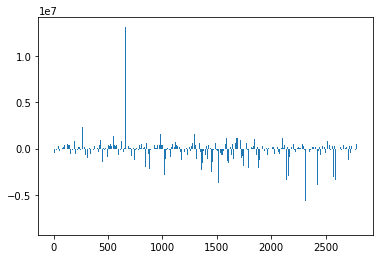

In [153]:
from statsmodels.tsa.arima_model import ARIMA

y02_3000 = y02[:3000]
y02_2800 = y02[:2800]

model_d0 = ARIMA(y02_2800, (3,0,2))
results_d0 = model_d0.fit()
res_d0 = results_d0.resid

# 残差
plt.bar(range(len(res_d0[1:])), res_d0[1:])
y02_2800

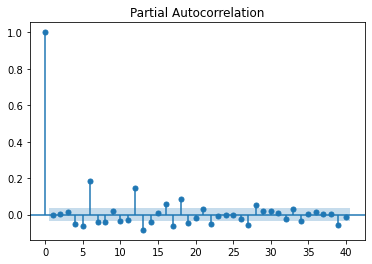

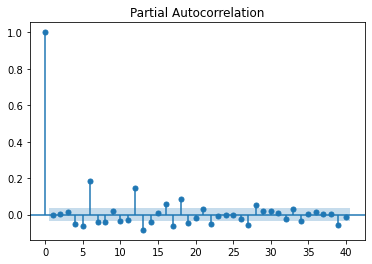

In [154]:
from statsmodels.graphics import tsaplots

tsaplots.plot_pacf(res_d0[1:], lags=40)

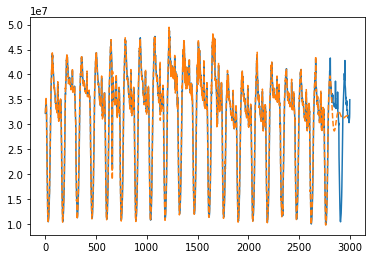

In [155]:
plt.plot(y02_3000.values, label='observation')

plt.plot(results_d0.predict(1, len(y02_3000)).values, '--', label='forecast')

/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -10T will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51840D+01    |proj g|=  1.72307D-04

At iterate    5    f=  1.51839D+01    |proj g|=  1.01785D-04

At iterate   10    f=  1.51839D+01    |proj g|=  1.06581D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     23      1     0     0   3.553D-07   1.518D+01
  F =   15.183949712699359     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<BarContainer object of 2798 artists>

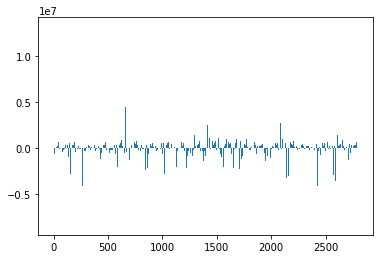

In [156]:
model_d1 = ARIMA(y02_2800, (4,1,1))
results_d1 = model_d1.fit()
res_d1 = results_d1.resid

# 残差
plt.bar(range(len(res_d1[1:])), res_d1[1:])

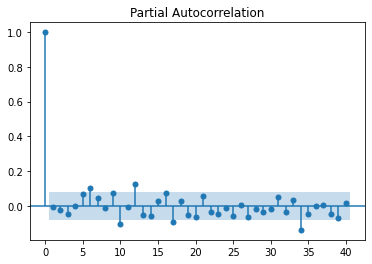

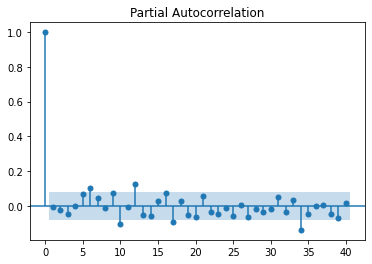

In [104]:
tsaplots.plot_pacf(res_d1[1:], lags=40)

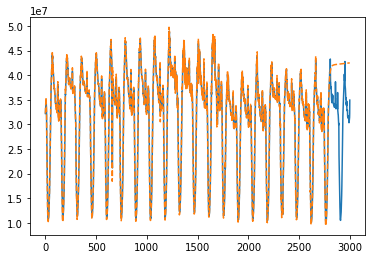

In [157]:
plt.plot(y02_3000.values, label='observation')

plt.plot(results_d1.predict(1, len(y02_3000), typ='levels').values, '--', label='forecast')

/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency -10T will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34401D+01    |proj g|=  8.91419D-02

At iterate    5    f=  1.34364D+01    |proj g|=  7.57709D-03

At iterate   10    f=  1.34361D+01    |proj g|=  2.89499D-03

At iterate   15    f=  1.34359D+01    |proj g|=  1.67276D-03

At iterate   20    f=  1.34359D+01    |proj g|=  2.00524D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     31      1     0     0   8.262D-06   1.344D+01
  F =   13.435921026902285     

CONVERG

<BarContainer object of 2800 artists>

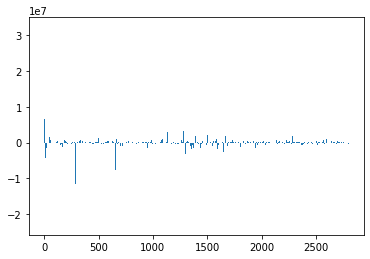

In [163]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


p, d, q, sp, sd, sq = 2, 1, 2, 1, 1, 1
seasonal = 6 * 24

result = SARIMAX(y02_2800, order=(p,d,q), seasonal_order=(sp, sd, sq, seasonal), enforce_stationarity=False, enforce_invertibility=False).fit()

res = result.resid

plt.bar(range(len(res)), res)

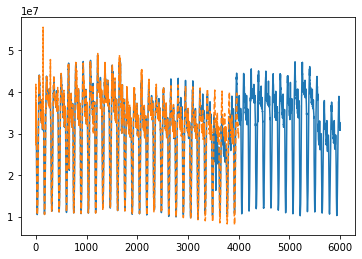

In [169]:
y02_4000 = y02[:4000]

plt.plot(y02_4000.values, label='observation')

plt.plot(np.hstack([y02_4000[0], result.fittedvalues[1:], result.forecast(1200)]), '--', label='forecast')